# Racks_f 하루 Tmp, SoC 그래프

데이터를 날짜를 제거하고 시간의 분을 기준으로 평균을 내어, 하루 그래프를 그려봄

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
racks_f_df = pd.read_csv(r'dataset\racks_f_total_dataset.csv', dtype={'EvtVnd1': object, 'EvtVnd2': object, 'EvtVnd3': object})

In [3]:
racks_f_df['Time'] = pd.to_datetime(racks_f_df['Time'])

In [4]:
df = racks_f_df.loc[:, ['Time',
                        'Tmp', 'TmpMax','TmpMin',
                        'VCell', 'VCellMax', 'VCellMin',
                        'A', 'AChaMax', 'ADisChaMax',
                        'EvtVnd1', 'EvtVnd2', 'EvtVnd3',
                        'SoC', 'V', 'Racks']]

In [5]:
normal_df = df[(df['EvtVnd1'].isna() & df['EvtVnd2'].isna() & df['EvtVnd3'].isna())]

In [6]:
normal_tmp_df = normal_df.loc[:, ['Time', 'Tmp']]
normal_tmp_df['Time'] = normal_tmp_df['Time'].apply(lambda x: (x.hour * 60) + x.minute)
normal_tmp_df.drop(normal_tmp_df.loc[normal_tmp_df['Tmp'] <= 0.0].index, inplace=True)
normal_tmp_mean_df = normal_tmp_df.groupby(by='Time').agg({'Tmp':'mean'})

In [7]:
normal_SoC_df = normal_df.loc[:, ['Time', 'SoC']]
normal_SoC_df['Time'] = normal_SoC_df['Time'].apply(lambda x: (x.hour * 60) + x.minute)
normal_SoC_df.drop(normal_SoC_df.loc[normal_SoC_df['SoC'] <= 0.0].index, inplace=True)
normal_SoC_mean_df = normal_SoC_df.groupby(by='Time').agg({'SoC':'mean'})

In [8]:
evt_df = df[(df['EvtVnd1'].notna() | df['EvtVnd2'].notna() | df['EvtVnd3'].notna())]

In [9]:
evt_tmp_df = evt_df.loc[:, ['Time', 'Tmp']]
evt_tmp_df['Time'] = evt_tmp_df['Time'].apply(lambda x: (x.hour * 60) + x.minute)
evt_tmp_df.drop(evt_tmp_df.loc[evt_tmp_df['Tmp'] <= 0.0].index, inplace=True)
evt_tmp_mean_df = evt_tmp_df.groupby(by='Time').agg({'Tmp':'mean'})

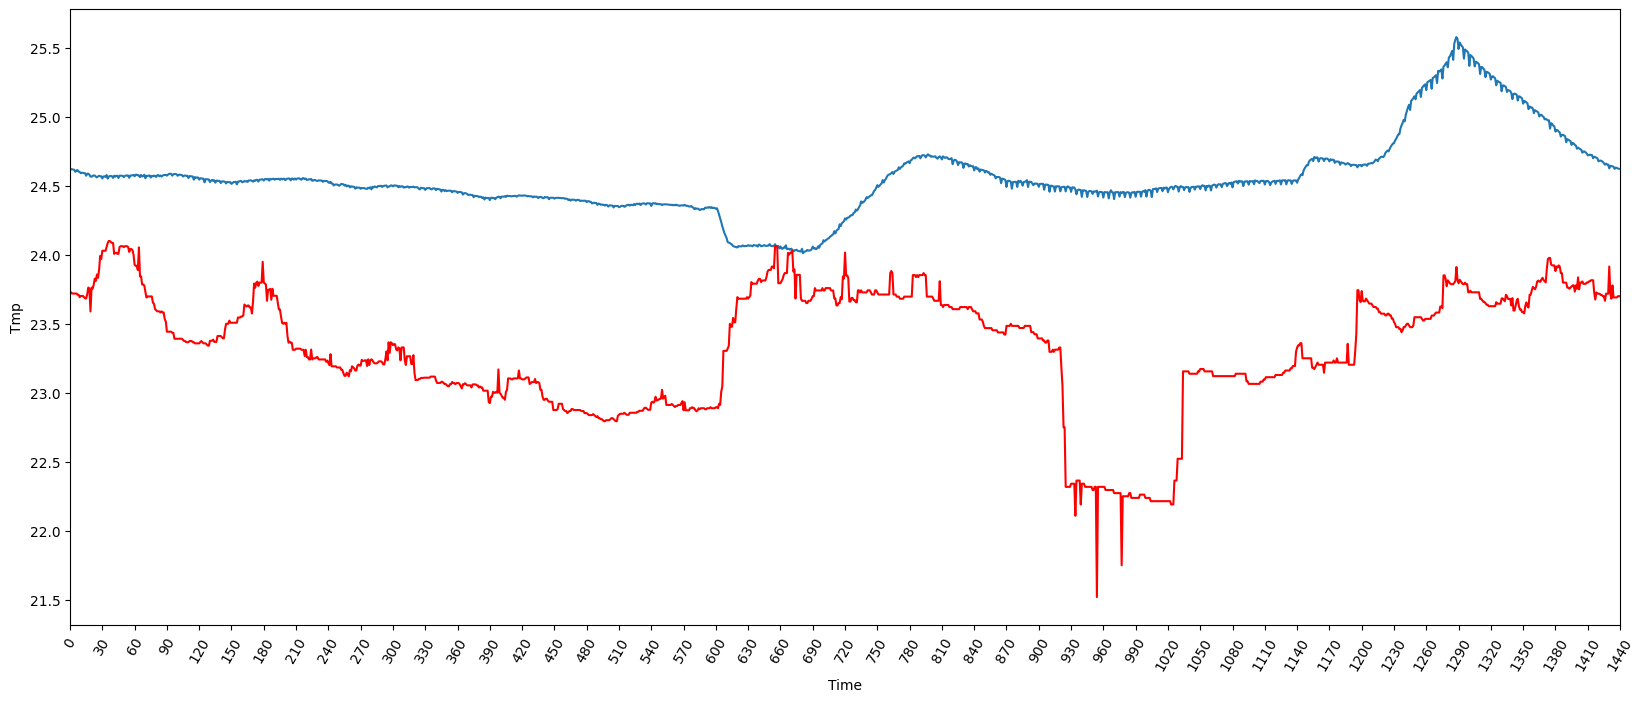

In [10]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=normal_tmp_mean_df, x='Time', y='Tmp', ax=ax, legend=False)
sns.lineplot(data=evt_tmp_mean_df, x='Time', y='Tmp', ax=ax, color='r', legend=False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))

plt.xlim((0, 1440))
plt.xticks(rotation=60)

plt.show()

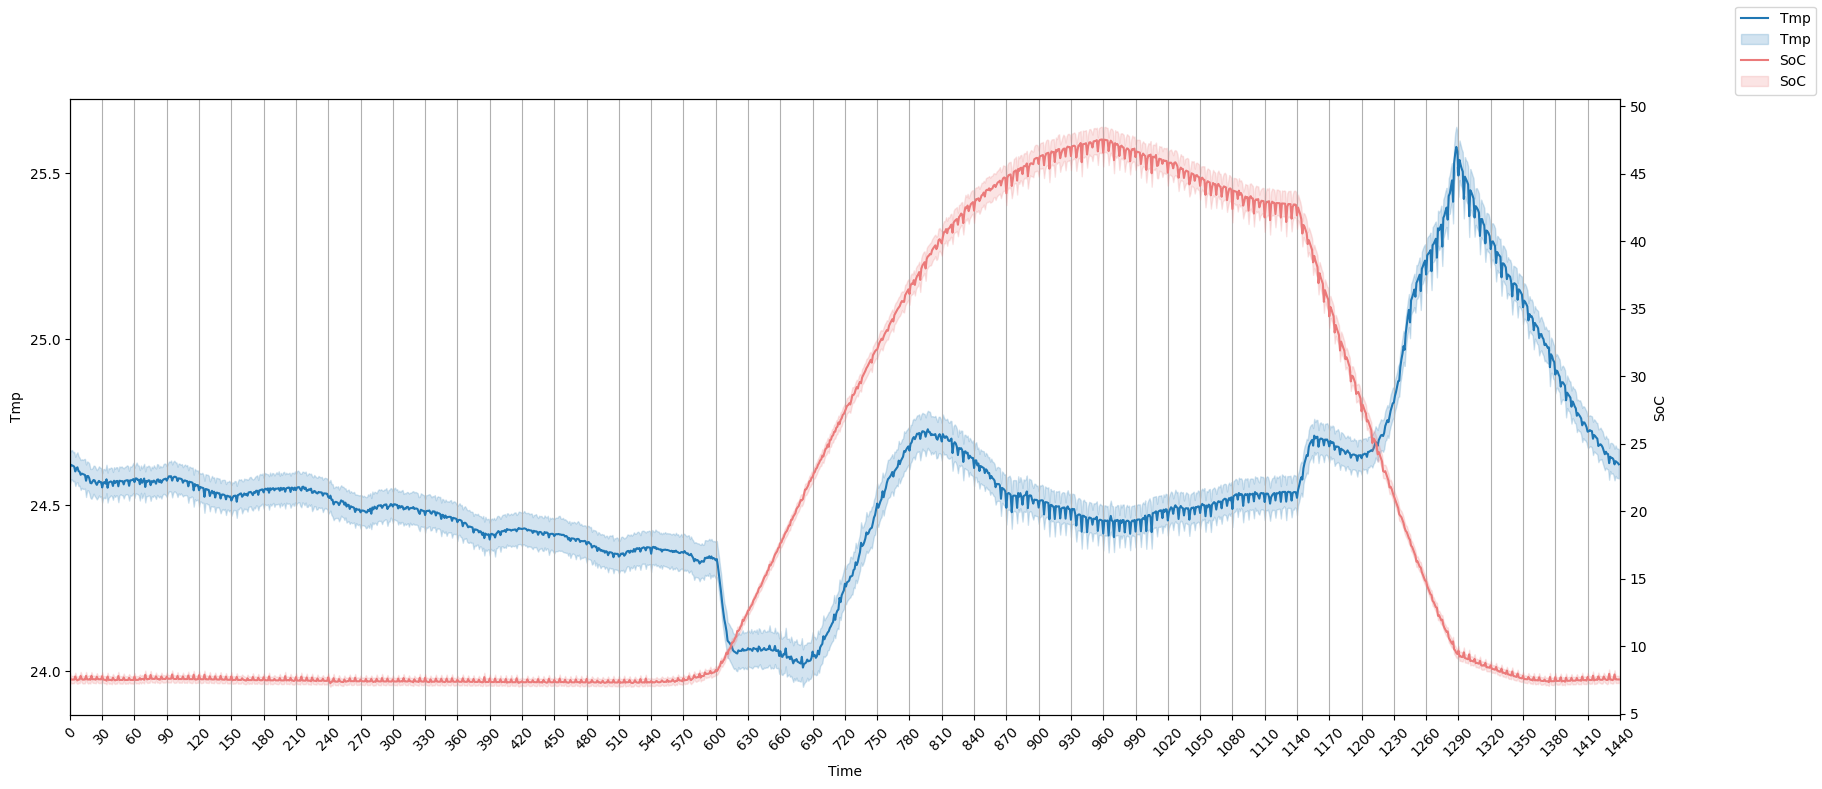

In [11]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=normal_tmp_df, x='Time', y='Tmp', ax=ax, legend=False)

ax_2 = ax.twinx()
sns.lineplot(data=normal_SoC_df, x='Time', y='SoC', ax=ax_2, color='#EB7A7A')

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))
ax_2.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.grid(True)
ax.tick_params(axis='x', labelrotation=45)

plt.xlim((0, 1440))

fig.legend(labels=["Tmp", "Tmp", "SoC", "SoC"])

plt.show()